Задание 

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.

Файл доступен тут - https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:

1.satisfaction_level​ -Уровень удовлетворенности работой

2.Last_evaluation ​- Время с момента последней оценки в годах

3.number_projects​ - Количество проектов, выполненных за время работы

4.average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц

5.time_spend_company​ - Стаж работы в компании в годах

6.work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником

7.left​ - уволился ли сотрудник

8.promotion_last_5years​ - повышался ли сотрудник за последние пять лет

9.department ​- отдел в котором работает сотрудник

10.salary​ - относительный уровень зарплаты


In [ ]:
#Подготовительные моменты
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
tast = pd.read_excel("Table.xlsx")
tast

,#,Задание,Баллы
0,1,Загрузите файл HR.csv в pandas dataframe,5
1,2,Рассчитайте основные статистики для переменных...,10
2,3,Рассчитайте и визуализировать корреляционную м...,10
3,4,Рассчитайте сколько сотрудников работает в каж...,5
4,5,Показать распределение сотрудников по зарплатам.,5
5,6,Показать распределение сотрудников по зарплата...,5
6,7,"Проверить гипотезу, что сотрудники с высоким о...",10
7,8,Рассчитать следующие показатели среди уволивши...,10
8,9,Разделить данные на тестовую и обучающую выбор...,20
9,10,Загрузить jupyter notebook с решение на github...,5


Итого - максимум 85 баллов

Для зачета необходимо набрать минимум 55

**Задание 1**

Загрузите файл HR.csv в pandas dataframe

In [ ]:
#Загружаем и выводим датасет
df = pd.read_csv("HR.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


**Задание 2**

Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [ ]:
# Вывод основных базовых статистик (кол-во, среднее, стандартное отклонение значения, mix/max)
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# Медиана столбцов
df.median()

<ipython-input-18-4c9e34f27443>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median ()


satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [ ]:
# Мода столбцов
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


**Задание 3**

Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [ ]:
#Убираем лишние столбцы
df_split = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']]
df_split.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [ ]:
#Расчёт корреляций столбцов
df_split.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


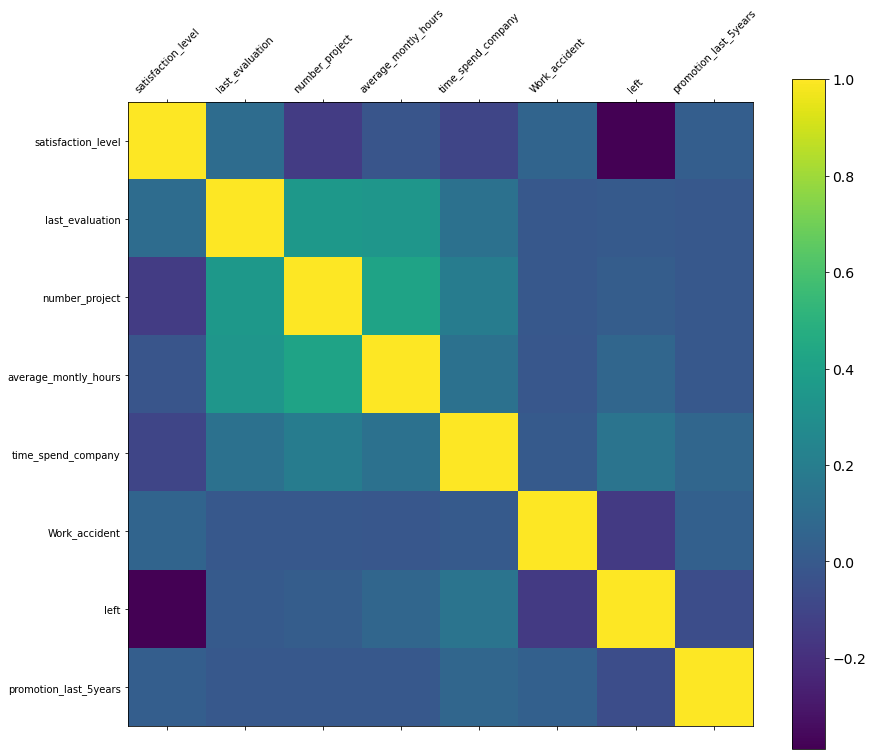

In [ ]:
#Строим матрицу корреляций
figure = plt.figure(figsize = (14, 12))
plt.matshow(df_split.corr(), fignum = figure.number)
plt.xticks(range(df_split.shape[1]), df_split.columns, fontsize = 10, rotation = 45)
plt.yticks(range(df_split.shape[1]), df_split.columns, fontsize = 10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)

**Наибольшая корреляция видна в следующих столбцах:**

1) *average_montly_hours и number_project*

2) *last_evaluation и number_project*

**Наименьшая корреляция видна в следующих столбцах:**

1) *left и satisfaction_level*

2) *left и Work_accident*

**Задание 4**

Рассчитайте сколько сотрудников работает в каждом департаменте.

In [ ]:
#Расчёт сколько сотрудников работает в каждом департаменте
df.groupby('department')['department'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

**Задание 5**

Показать распределение сотрудников по зарплатам.

<AxesSubplot:ylabel='salary'>

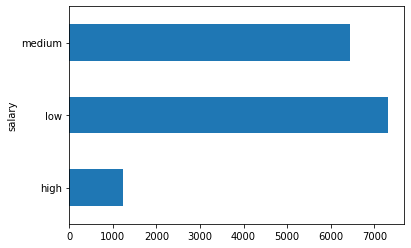

In [ ]:
df.groupby('salary')['salary'].count().plot(kind = "barh")

**Задание 6**

Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [ ]:
df_sep = df.groupby([df['department'], df['salary']])[['salary']].count()
df_sep

salary
department  salary        
IT          high        83
            low        609
            medium     535
RandD       high        51
            low        364
            medium     372
accounting  high        74
            low        358
            medium     335
hr          high        45
            low        335
            medium     359
management  high       225
            low        180
            medium     225
marketing   high        80
            low        402
            medium     376
product_mng high        68
            low        451
            medium     383
sales       high       269
            low       2099
            medium    1772
support     high       141
            low       1146
            medium     942
technical   high       201
            low       1372
            medium    1147

<AxesSubplot:ylabel='department,salary'>

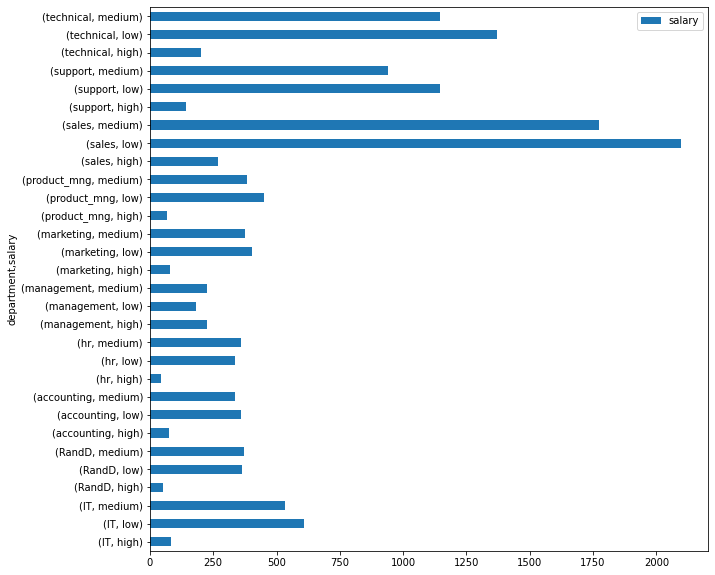

In [ ]:
df_sep.plot(kind = "barh", figsize = (10,10))

**Задание 7**

Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [ ]:
df_high = list(df.loc[df['salary'] == 'high']['average_montly_hours'])

In [ ]:
df_low = list(df.loc[df['salary'] == 'low']['average_montly_hours'])

Два графика распределения зарплаты от кол-ва проведенного на работе времени


Ttest_indResult(statistic=-0.7288680398062308, pvalue=0.4661023478267259)

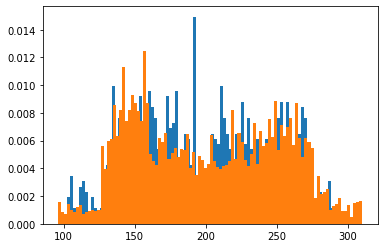

In [ ]:
plt.hist(df_high, bins = 100, density = True)
plt.hist(df_low, bins = 100, density = True)
print('Два графика распределения зарплаты от кол-ва проведенного на работе времени')
stats.ttest_ind(df_high, df_low) #

**p ≈ 0.47, при уровне значимости p = 0.05 - из этого следует, что гипотеза не верна - оклад не влияет на рабочее время.**

***Задание 8***

Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

● Доля сотрудников с повышением за последние 5 лет

● Средняя степень удовлетворенности

● Среднее количество проектов

In [ ]:
#Отберём уволившихся сотрудников
df_left = df.loc[df['left'] == 1]
df_left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
#Доля уволившихся сотрудников с повышением за последние 5 лет
len(df_left.loc[df_left['promotion_last_5years'] == 1])/len(df_left)

0.005320638476617194

In [ ]:
#Средняя степень удовлетворенности уволившихся сотрудников
df_left['satisfaction_level'].mean()

0.4400980117614114

In [ ]:
#Среднее количество проектов уволившихся сотрудников
df_left['number_project'].mean()

3.8555026603192384

In [ ]:
#Отберём неуволившихся сотрудников
df_noleft = df.loc[df['left'] == 0]
df_noleft.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [ ]:
#Доля неуволившихся сотрудников с повышением за последние 5 лет
len(df_noleft.loc[df_noleft['promotion_last_5years'] == 1])/len(df_noleft)

0.026251312565628283

In [ ]:
#Средняя степень удовлетворенности неуволившихся сотрудников
df_noleft['satisfaction_level'].mean()

0.666809590479524

In [ ]:
#Среднее количество проектов неуволившихся сотрудников
df_noleft['number_project'].mean()

3.786664333216661

**Задание 9**

Разделить данные на тестовую и обучающую выборки

Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)

Оценить качество модели на тестовой выборки

In [ ]:
#Подготовим массив "уволился ли сотрудник"
left = pd.array(df['left'])

In [ ]:
# разделяем выборку на тренировочную(70%) и тестовую(30%)
X_train, X_test, y_train, y_test = train_test_split(df[['satisfaction_level','last_evaluation','number_project',
                                                            'average_montly_hours','time_spend_company','Work_accident',
                                                            'promotion_last_5years']], left, test_size = 0.30)

In [ ]:
# импортируем LDA-функционал и обучаем модель
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result.columns = ['Факт', 'Прогноз']
result

,Факт,Прогноз
0,0,0
1,1,1
2,0,1
3,0,0
4,0,0
...,...,...
4495,1,0
4496,1,0
4497,1,0
4498,0,0


In [ ]:
# расчет точности модели
print('Обучение прошло с точностью верных прогнозов к общему кол-ву позиций :' , accuracy_score(y_test, lda.predict(X_test)).round(2))

Обучение прошло с точностью верных прогнозов к общему кол-ву позиций : 0.76


Судя по п.3 у нас на увольнение мало какие другие данные влияют, так что не удивительно, что не 100% попадание